# Data 601 Project Phase 2
# Capital Bikeshare system between 2011 and 2012
## Thanusha Balasubramanian (UCID: 10125932)

## Project Question: Which variables have the greatest impact on hourly Capital Bikeshare usage (cnt)?



The source of the data is https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
The hour.csv dataset is being used.

Citation: (Fanaee-T, H. (2013). Bike Sharing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.).

### - Section 1: Data Import & Initial Overview -

In [348]:
## Import packages we will be using
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

Note: Please ensure data (csv file) is uploaded on the left

In [349]:
#load in the data flight data
df_bike_share = pd.read_csv('/content/hour.csv')
df_bike_share.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [350]:
## Check the python Datatypes of the "raw" data from the repo.
df_bike_share.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [351]:
##Check for N/a data
df_bike_share.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


#### Below is a table of the "raw" data from the hour.csv file in the UC Irvine repo, including description of any pre-cleaning or transformation done by UC Irvine

As we can see some of the categorical variables were given integer values in the data.

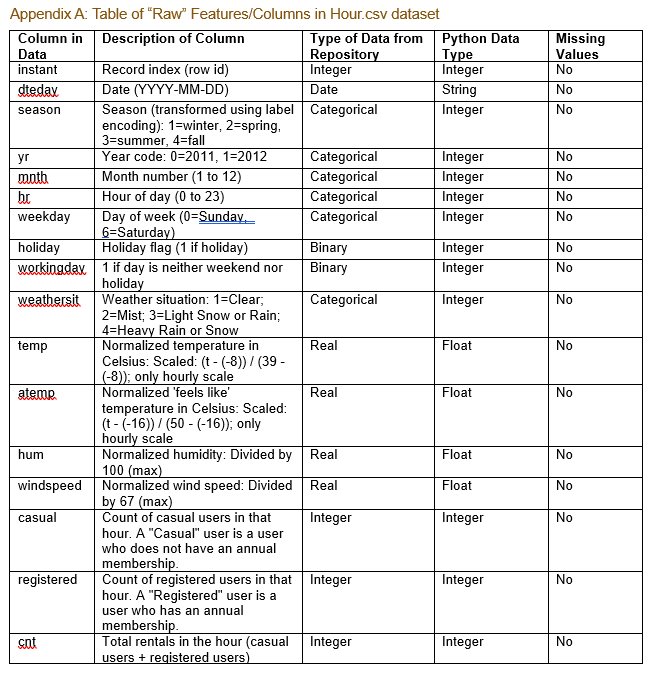

Based on the fact that some categorical variables in the dataset were given integer values and some of the binary values were imported as number instead of boolean we will have to clean the data. I would also like to transform some of the normalized values back to the raw amounts (ie. convert temperature from the normalized value to the actual value in celcius)

### - Section 2: Initial Data Cleaning For EDA -

Appendix B: Code for Initial Pre-Cleaning for EDA

In [352]:
## Clean the Date
from datetime import date
df_bike_share["Date_Cleaned"] = pd.to_datetime(df_bike_share["dteday"])

## Clean the Season
df_bike_share["Season_Cleaned"] = df_bike_share["season"].replace([1,2,3,4],["Winter","Spring","Summer","Fall"])

## Clean the Year
df_bike_share["Year_Cleaned"] = df_bike_share["yr"].replace([0,1],[2011,2012])

## Clean the Month
df_bike_share["Month_Cleaned"] = df_bike_share["mnth"].replace([1,2,3,4,5,6,7,8,9,10,11,12],["January","February","March","April","May","June","July","August","September","October","November","December"])

## Clean the Hour
df_bike_share["Hour_Cleaned"] = pd.to_datetime(df_bike_share["hr"], format='%H').dt.strftime('%I:%M %p')

## Clean the Holiday Column
df_bike_share["Holiday_Cleaned"] = df_bike_share["holiday"].astype(bool)

## Clean the Weekday Column
df_bike_share["Weekday_Cleaned"] = df_bike_share["weekday"].replace([0,1,2,3,4,5,6],["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

## Clean the Working Day Column
df_bike_share["WorkingDay_Cleaned"] = df_bike_share["workingday"].astype(bool)

## Clean the Weather Situation column
df_bike_share["Weather_Cleaned"] = df_bike_share["weathersit"].replace([1,2,3,4],["Clear","Misty","Light Rain/Snow","Heavy Rain/Snow"])

## Transform the Temperature back to celcius
t_min = -8
t_max = 39
df_bike_share["Temp_Celcius"] = (df_bike_share["temp"]*(t_max - t_min)) + t_min

## Transform the Feeling Temperature back to celcius
t_min = -16
t_max = 50
df_bike_share["Feel_Temp_Celcius"] = (df_bike_share["atemp"]*(t_max - t_min)) + t_min

## Transform Windspeed back
df_bike_share["Windspeed_Cleaned"] = df_bike_share["windspeed"]*67

## select which columns we want to subset into a new data frame
selected_columns = ["Date_Cleaned", "Season_Cleaned", "Year_Cleaned","Month_Cleaned","Hour_Cleaned","Holiday_Cleaned","Weekday_Cleaned","WorkingDay_Cleaned","Weather_Cleaned","Temp_Celcius","Feel_Temp_Celcius","Windspeed_Cleaned","hum","casual","registered","cnt"]
## Create a new datafram with cleaned columns
df_bike_share_clean = df_bike_share[selected_columns]

df_bike_share_clean.head(5)

,Date_Cleaned,Season_Cleaned,Year_Cleaned,Month_Cleaned,Hour_Cleaned,Holiday_Cleaned,Weekday_Cleaned,WorkingDay_Cleaned,Weather_Cleaned,Temp_Celcius,Feel_Temp_Celcius,Windspeed_Cleaned,hum,casual,registered,cnt
0,2011-01-01,Winter,2011,January,12:00 AM,False,Saturday,False,Clear,3.28,3.0014,0.0,0.81,3,13,16
1,2011-01-01,Winter,2011,January,01:00 AM,False,Saturday,False,Clear,2.34,1.9982,0.0,0.80,8,32,40
2,2011-01-01,Winter,2011,January,02:00 AM,False,Saturday,False,Clear,2.34,1.9982,0.0,0.80,5,27,32
3,2011-01-01,Winter,2011,January,03:00 AM,False,Saturday,False,Clear,3.28,3.0014,0.0,0.75,3,10,13
4,2011-01-01,Winter,2011,January,04:00 AM,False,Saturday,False,Clear,3.28,3.0014,0.0,0.75,0,1,1


Now that the data has been cleaned, we may describe the variables in the dataset.

In [353]:
df_bike_share_clean.dtypes

,0
Date_Cleaned,datetime64[ns]
Season_Cleaned,object
Year_Cleaned,int64
Month_Cleaned,object
Hour_Cleaned,object
Holiday_Cleaned,bool
Weekday_Cleaned,object
WorkingDay_Cleaned,bool
Weather_Cleaned,object
Temp_Celcius,float64


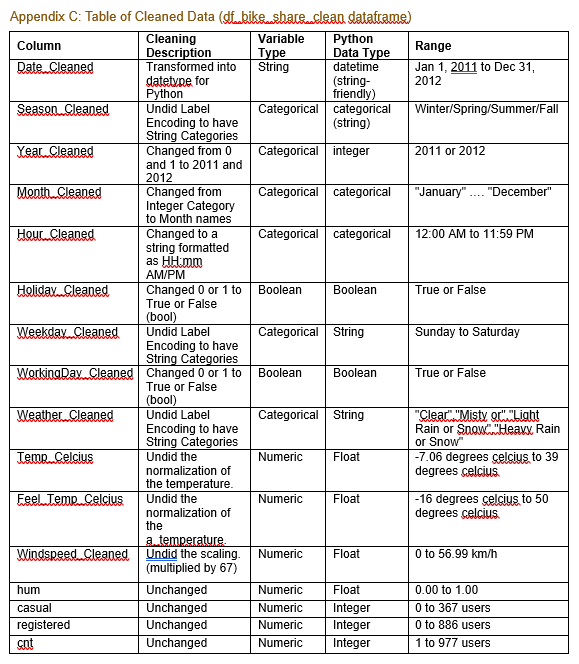

### - Section 3: Data Exploration & Visualization Section -

#### Summary Statistics

In [354]:
df_bike_share_clean.describe()

,Date_Cleaned,Year_Cleaned,Temp_Celcius,Feel_Temp_Celcius,Windspeed_Cleaned,hum,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2011.502561,15.358397,15.401157,12.736540,0.627229,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,2011.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2011.000000,7.980000,5.997800,7.001500,0.480000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,2012.000000,15.500000,15.996800,12.998000,0.630000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,2012.000000,23.020000,24.999200,16.997900,0.780000,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,2012.000000,39.000000,50.000000,56.996900,1.000000,367.000000,886.000000,977.000000
std,NaN,0.500008,9.050138,11.342114,8.196795,0.192930,49.305030,151.357286,181.387599


#### Visualizations

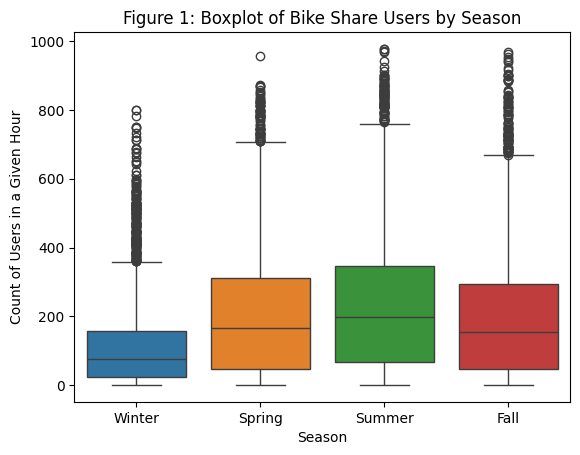

In [355]:
## Plot a boxplot of cnt categorized by season with ddifferent colors for seasons
ax = sns.boxplot(x='Season_Cleaned', y='cnt', data=df_bike_share_clean, hue ='Season_Cleaned')
ax.set_xlabel('Season', fontsize=10, color='black')
ax.set_ylabel('Count of Users in a Given Hour', fontsize=10, color='black')
plt.title("Figure 1: Boxplot of Bike Share Users by Season")
plt.show()


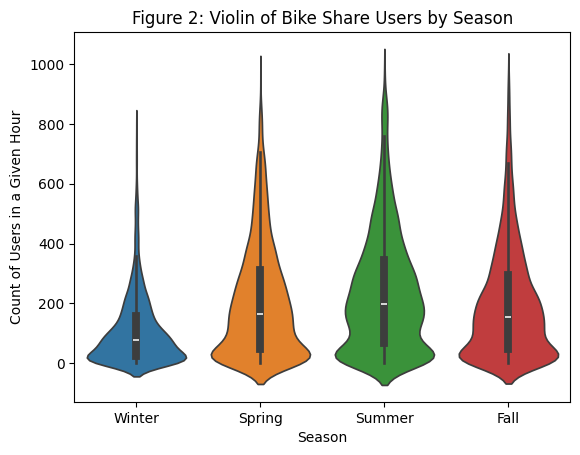

In [356]:
## Violint plot
ax = sns.violinplot(x='Season_Cleaned', y='cnt', data=df_bike_share_clean, hue ='Season_Cleaned')
ax.set_xlabel('Season', fontsize=10, color='black')
ax.set_ylabel('Count of Users in a Given Hour', fontsize=10, color='black')
plt.title("Figure 2: Violin of Bike Share Users by Season")
plt.show()

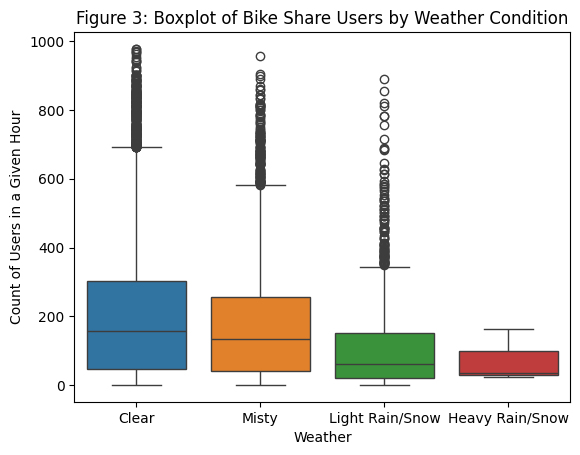

In [357]:
## Plot a boxplot of cnt categorized by season with ddifferent colors for seasons
ax = sns.boxplot(x='Weather_Cleaned', y='cnt', data=df_bike_share_clean, hue ='Weather_Cleaned')
ax.set_xlabel('Weather', fontsize=10, color='black')
ax.set_ylabel('Count of Users in a Given Hour', fontsize=10, color='black')
plt.title("Figure 3: Boxplot of Bike Share Users by Weather Condition")
plt.show()

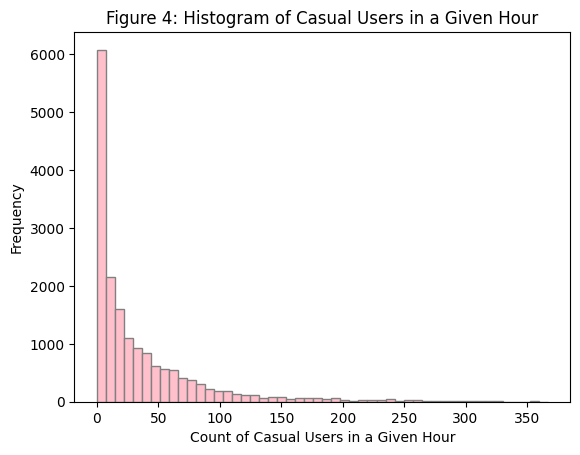

In [358]:
##Create a histogram of Casual Users
plt.hist(df_bike_share_clean['casual'], bins=50, color="pink", edgecolor = "grey")
plt.xlabel('Count of Casual Users in a Given Hour')
plt.ylabel('Frequency')
plt.title('Figure 4: Histogram of Casual Users in a Given Hour')
plt.show()


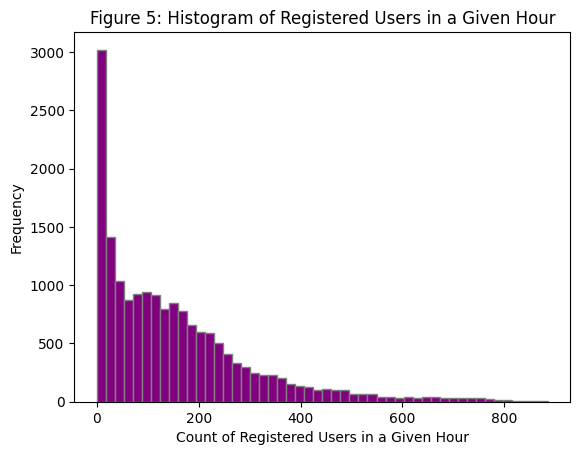

In [359]:
##Create a histogram of Registers Users
plt.hist(df_bike_share_clean['registered'], bins=50, color="purple", edgecolor = "grey")
plt.xlabel('Count of Registered Users in a Given Hour')
plt.ylabel('Frequency')
plt.title('Figure 5: Histogram of Registered Users in a Given Hour')
plt.show()

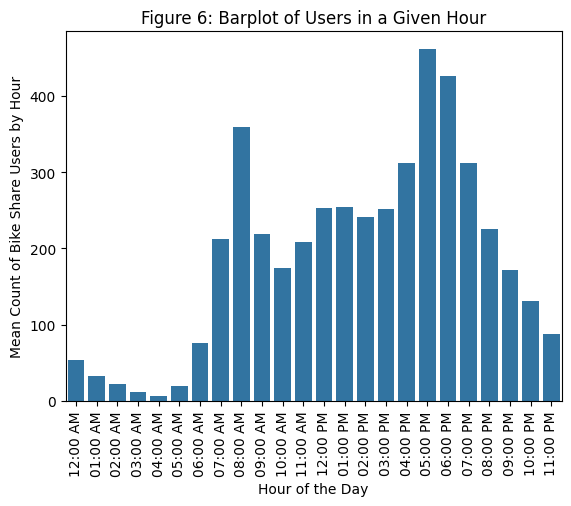

In [360]:
##Create a plot of users by hour
sns.barplot(x='Hour_Cleaned', y='cnt', data=df_bike_share_clean, errorbar=None)
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Count of Bike Share Users by Hour')
plt.title('Figure 6: Barplot of Users in a Given Hour')
plt.xticks(rotation=90)
plt.show()

#### Correlation Analysis

In [361]:
## Create the coorelation matrix
corr_matrix = df_bike_share_clean.corr(numeric_only=True)
corr_matrix

,Year_Cleaned,Holiday_Cleaned,WorkingDay_Cleaned,Temp_Celcius,Feel_Temp_Celcius,Windspeed_Cleaned,hum,casual,registered,cnt
Year_Cleaned,1.000000,0.006692,-0.002196,0.040913,0.039222,-0.008740,-0.083546,0.142779,0.253684,0.250495
Holiday_Cleaned,0.006692,1.000000,-0.252471,-0.027340,-0.030973,0.003988,-0.010588,0.031564,-0.047345,-0.030927
WorkingDay_Cleaned,-0.002196,-0.252471,1.000000,0.055390,0.054667,-0.011830,0.015688,-0.300942,0.134326,0.030284
Temp_Celcius,0.040913,-0.027340,0.055390,1.000000,0.987672,-0.023125,-0.069881,0.459616,0.335361,0.404772
Feel_Temp_Celcius,0.039222,-0.030973,0.054667,0.987672,1.000000,-0.062336,-0.051918,0.454080,0.332559,0.400929
Windspeed_Cleaned,-0.008740,0.003988,-0.011830,-0.023125,-0.062336,1.000000,-0.290105,0.090287,0.082321,0.093234
hum,-0.083546,-0.010588,0.015688,-0.069881,-0.051918,-0.290105,1.000000,-0.347028,-0.273933,-0.322911
casual,0.142779,0.031564,-0.300942,0.459616,0.454080,0.090287,-0.347028,1.000000,0.506618,0.694564
registered,0.253684,-0.047345,0.134326,0.335361,0.332559,0.082321,-0.273933,0.506618,1.000000,0.972151
cnt,0.250495,-0.030927,0.030284,0.404772,0.400929,0.093234,-0.322911,0.694564,0.972151,1.000000


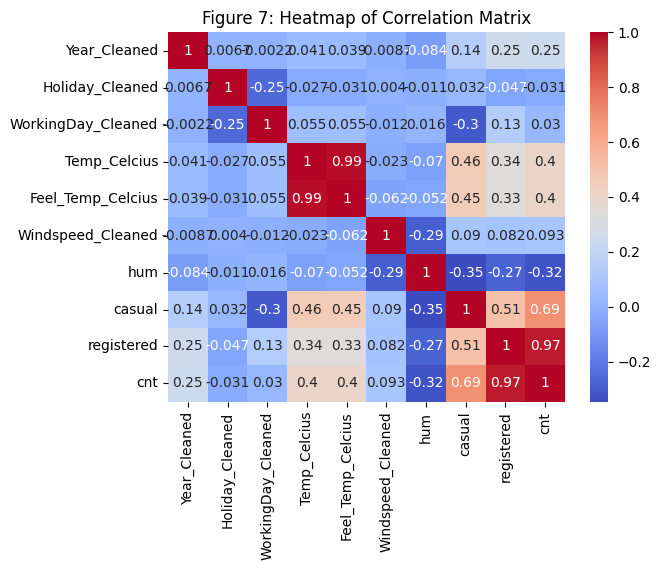

In [362]:
#plot the results as a heat map
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Figure 7: Heatmap of Correlation Matrix')
plt.show()

### - Section 4: Data Wrangling & Processing for Modeling -

#### Label and One Hot Encoding

In [363]:
## label encoding for season where Winer, Spring, Fall, Summer Fall is 1, 2, 3, 4
df_bike_share_clean['Season_Cleaned'] = df_bike_share_clean['Season_Cleaned'].replace(['Winter','Spring','Summer','Fall'],[1,2,3,4])

## Label encoding for day of week where 1 = Sunday
df_bike_share_clean['Weekday_Cleaned'] = df_bike_share_clean['Weekday_Cleaned'].replace(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],[1,2,3,4,5,6,7])

## Label encoding for Month
df_bike_share_clean['Month_Cleaned'] = df_bike_share_clean['Month_Cleaned'].replace(['January','February','March','April','May','June','July','August','September','October','November','December'],[1,2,3,4,5,6,7,8,9,10,11,12])

## On Hot encoding for weather
df_bike_share_clean = pd.get_dummies(df_bike_share_clean, columns=['Weather_Cleaned'])

# head
df_bike_share_clean.head(5)

/tmp/ipython-input-3996972296.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bike_share_clean['Season_Cleaned'] = df_bike_share_clean['Season_Cleaned'].replace(['Winter','Spring','Summer','Fall'],[1,2,3,4])
/tmp/ipython-input-3996972296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_share_clean['Season_Cleaned'] = df_bike_share_clean['Season_Cleaned'].replace(['Winter','Spring','Summer','Fall'],[1,2,3,4])
/tmp/ipython-input-3996972296.py:5: FutureWarning: Downcasting behavior in `replace` is deprec

,Date_Cleaned,Season_Cleaned,Year_Cleaned,Month_Cleaned,Hour_Cleaned,Holiday_Cleaned,Weekday_Cleaned,WorkingDay_Cleaned,Temp_Celcius,Feel_Temp_Celcius,Windspeed_Cleaned,hum,casual,registered,cnt,Weather_Cleaned_Clear,Weather_Cleaned_Heavy Rain/Snow,Weather_Cleaned_Light Rain/Snow,Weather_Cleaned_Misty
0,2011-01-01,1,2011,1,12:00 AM,False,7,False,3.28,3.0014,0.0,0.81,3,13,16,True,False,False,False
1,2011-01-01,1,2011,1,01:00 AM,False,7,False,2.34,1.9982,0.0,0.80,8,32,40,True,False,False,False
2,2011-01-01,1,2011,1,02:00 AM,False,7,False,2.34,1.9982,0.0,0.80,5,27,32,True,False,False,False
3,2011-01-01,1,2011,1,03:00 AM,False,7,False,3.28,3.0014,0.0,0.75,3,10,13,True,False,False,False
4,2011-01-01,1,2011,1,04:00 AM,False,7,False,3.28,3.0014,0.0,0.75,0,1,1,True,False,False,False


In [364]:
## Let's take a look at the datatypes
df_bike_share_clean.dtypes

,0
Date_Cleaned,datetime64[ns]
Season_Cleaned,int64
Year_Cleaned,int64
Month_Cleaned,int64
Hour_Cleaned,object
Holiday_Cleaned,bool
Weekday_Cleaned,int64
WorkingDay_Cleaned,bool
Temp_Celcius,float64
Feel_Temp_Celcius,float64


#### Change Hour Back to Numerical Variable

In [365]:
## We need to transform the hour back into a numerical variable
df_bike_share_clean['Hour_Cleaned'] = pd.to_datetime(df_bike_share_clean['Hour_Cleaned'], format='%I:%M %p').dt.hour
df_bike_share_clean.head(5)

,Date_Cleaned,Season_Cleaned,Year_Cleaned,Month_Cleaned,Hour_Cleaned,Holiday_Cleaned,Weekday_Cleaned,WorkingDay_Cleaned,Temp_Celcius,Feel_Temp_Celcius,Windspeed_Cleaned,hum,casual,registered,cnt,Weather_Cleaned_Clear,Weather_Cleaned_Heavy Rain/Snow,Weather_Cleaned_Light Rain/Snow,Weather_Cleaned_Misty
0,2011-01-01,1,2011,1,0,False,7,False,3.28,3.0014,0.0,0.81,3,13,16,True,False,False,False
1,2011-01-01,1,2011,1,1,False,7,False,2.34,1.9982,0.0,0.80,8,32,40,True,False,False,False
2,2011-01-01,1,2011,1,2,False,7,False,2.34,1.9982,0.0,0.80,5,27,32,True,False,False,False
3,2011-01-01,1,2011,1,3,False,7,False,3.28,3.0014,0.0,0.75,3,10,13,True,False,False,False
4,2011-01-01,1,2011,1,4,False,7,False,3.28,3.0014,0.0,0.75,0,1,1,True,False,False,False


In [366]:
df_bike_share_clean.dtypes

,0
Date_Cleaned,datetime64[ns]
Season_Cleaned,int64
Year_Cleaned,int64
Month_Cleaned,int64
Hour_Cleaned,int32
Holiday_Cleaned,bool
Weekday_Cleaned,int64
WorkingDay_Cleaned,bool
Temp_Celcius,float64
Feel_Temp_Celcius,float64


### - Section 5: Build & Test Models-

#### Model 1: Linear Regression

Split the Data into Training and Test Data

In [367]:
### Let's split the data into training and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## we will drop Date_Cleaned (as it is a datetimeformat), registered and casual (as we are only looking at the total users)
X = df_bike_share_clean.drop(['cnt','Date_Cleaned','registered', 'casual'], axis=1)
y = df_bike_share_clean['cnt']

## Randomly split the data using a seed value of 1387
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1387)

##
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build the Linear Regression Model

In [368]:
## Let's fit the linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [369]:
## Let's print the model intercept
print(reg.intercept_)

191.026387176332


In [370]:
## Let's print the model X variables and their respective linear regression coeficients
pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Season_Cleaned,21.890119
Year_Cleaned,40.708908
Month_Cleaned,-0.231910
Hour_Cleaned,53.502579
Holiday_Cleaned,-5.523858
Weekday_Cleaned,3.665948
WorkingDay_Cleaned,0.788988
Temp_Celcius,11.764879
Feel_Temp_Celcius,44.537354
Windspeed_Cleaned,6.653328


In [371]:
## Let's test the model
y_pred_test = reg.predict(X_test_scaled)
y_pred_test
y_pred_train = reg.predict(X_train_scaled)
y_pred_train

array([-111.40050869,   10.3285402 ,  201.15280217, ...,  175.49826975,
        115.85372295,   85.16539881])

Get the RMSE for Test and Training Data

In [372]:
##Let's get the RMSE for Training Data
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
rmse_train

np.float64(142.30309815865888)

In [373]:
##Let's get the RMSE for Test Data
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
rmse_test

np.float64(139.78435870570055)

#### Model 2: Random Forest

We Will Run the Model on the Pre-Processed "Clean" data that we also used for the Regression

In [374]:
df_bike_share_clean.head(5)

,Date_Cleaned,Season_Cleaned,Year_Cleaned,Month_Cleaned,Hour_Cleaned,Holiday_Cleaned,Weekday_Cleaned,WorkingDay_Cleaned,Temp_Celcius,Feel_Temp_Celcius,Windspeed_Cleaned,hum,casual,registered,cnt,Weather_Cleaned_Clear,Weather_Cleaned_Heavy Rain/Snow,Weather_Cleaned_Light Rain/Snow,Weather_Cleaned_Misty
0,2011-01-01,1,2011,1,0,False,7,False,3.28,3.0014,0.0,0.81,3,13,16,True,False,False,False
1,2011-01-01,1,2011,1,1,False,7,False,2.34,1.9982,0.0,0.80,8,32,40,True,False,False,False
2,2011-01-01,1,2011,1,2,False,7,False,2.34,1.9982,0.0,0.80,5,27,32,True,False,False,False
3,2011-01-01,1,2011,1,3,False,7,False,3.28,3.0014,0.0,0.75,3,10,13,True,False,False,False
4,2011-01-01,1,2011,1,4,False,7,False,3.28,3.0014,0.0,0.75,0,1,1,True,False,False,False


Get the IQR for classification

In [375]:
# Get the quartiles for cnt
q1 = df_bike_share_clean['cnt'].quantile(0.25)
q3 = df_bike_share_clean['cnt'].quantile(0.75)
print(q1, q3)

40.0 281.0


Add the classifcation for usage.

In [376]:
### add the encoding for outcome based on cnt
## Class 1 = low useage
## Class 2 = medium usage
## Class 3 = high usage
df_bike_share_clean['usage_class'] = np.where(df_bike_share_clean['cnt'] < q1, 1, np.where(df_bike_share_clean['cnt'] > q3, 3, 2))

df_bike_share_clean.head(5)


,Date_Cleaned,Season_Cleaned,Year_Cleaned,Month_Cleaned,Hour_Cleaned,Holiday_Cleaned,Weekday_Cleaned,WorkingDay_Cleaned,Temp_Celcius,Feel_Temp_Celcius,Windspeed_Cleaned,hum,casual,registered,cnt,Weather_Cleaned_Clear,Weather_Cleaned_Heavy Rain/Snow,Weather_Cleaned_Light Rain/Snow,Weather_Cleaned_Misty,usage_class
0,2011-01-01,1,2011,1,0,False,7,False,3.28,3.0014,0.0,0.81,3,13,16,True,False,False,False,1
1,2011-01-01,1,2011,1,1,False,7,False,2.34,1.9982,0.0,0.80,8,32,40,True,False,False,False,2
2,2011-01-01,1,2011,1,2,False,7,False,2.34,1.9982,0.0,0.80,5,27,32,True,False,False,False,1
3,2011-01-01,1,2011,1,3,False,7,False,3.28,3.0014,0.0,0.75,3,10,13,True,False,False,False,1
4,2011-01-01,1,2011,1,4,False,7,False,3.28,3.0014,0.0,0.75,0,1,1,True,False,False,False,1


Build an intial random forrest model

We will use a random forrest model with a train/test split of 80/20 (conventional split).

This time we are using a seed of 2005. Although the data is randomly being split into training and test (where 80% of data will be in the training set) using a seed value ensures, that the same random sample can be selected again. (ie. ensure replicability).

In [377]:
## Let's split the data into x and y
x_rf = df_bike_share_clean.drop(['cnt','Date_Cleaned','registered', 'casual','usage_class'], axis=1)
y_rf = df_bike_share_clean['usage_class']

## Randomly split the data using a seed
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size=0.2, random_state=2005)

In [378]:
## Build the random forrest model
from sklearn.ensemble import RandomForestClassifier
forrest_classifier = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features=0.8, max_samples=0.8, max_depth=5,random_state=2005)

## Fit the model to our data
forrest_classifier.fit(x_train_rf, y_train_rf)

RandomForestClassifier(max_depth=5, max_features=0.8, max_samples=0.8,
                       random_state=2005)

Find the optimal number of features (hyperparameter tuning)

In [337]:
from sklearn.feature_selection import RFECV

#min number of variables/features
min_features_to_select = 1

#build the feature selection algorithm
rfecv = RFECV(estimator= forrest_classifier, step=1, cv=5, min_features_to_select=min_features_to_select)

#fit the algorithm to the data
rfecv.fit(x_train_rf, y_train_rf)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


Text(0.5, 1.0, 'Figure 8: Recursive Feature Elimination with Cross-Validation (RFECV)')

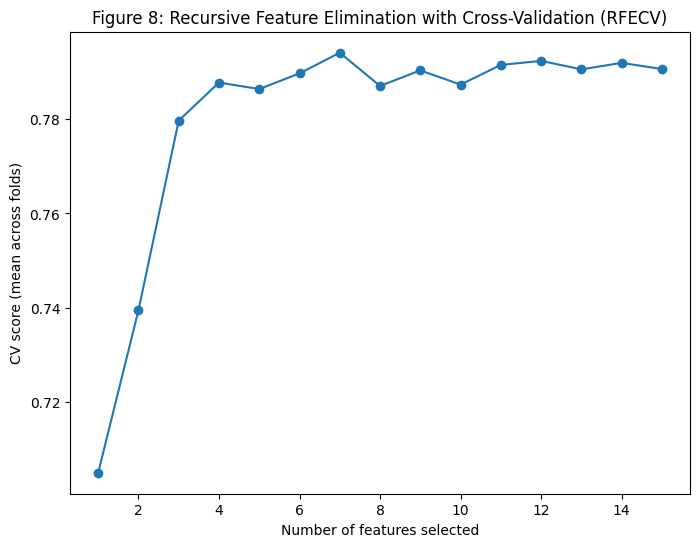

In [338]:
import matplotlib.pyplot as plt
import numpy as np

# Number of features tested
n_features = range(
    rfecv.min_features_to_select,
    len(rfecv.cv_results_["mean_test_score"]) + rfecv.min_features_to_select
)

# Plot the scores
plt.figure(figsize=(8,6))
plt.plot(n_features, rfecv.cv_results_["mean_test_score"], marker="o")
plt.xlabel("Number of features selected")
plt.ylabel("CV score (mean across folds)")
plt.title("Figure 8: Recursive Feature Elimination with Cross-Validation (RFECV)")

In [339]:
selected_features = X_train.columns[rfecv.support_]
print("Selected features:", list(selected_features))

Selected features: ['Year_Cleaned', 'Hour_Cleaned', 'Weekday_Cleaned', 'WorkingDay_Cleaned', 'Temp_Celcius', 'Feel_Temp_Celcius', 'hum']


Run the model on the optimized number of features

In [340]:
## Let's subset our dat for the optimal features
x_rf_opt = df_bike_share_clean[selected_features]
y_rf_opt = df_bike_share_clean['usage_class']

## Split the data
x_train_rf_opt, x_test_rf_opt, y_train_rf_opt, y_test_rf_opt = train_test_split(x_rf_opt, y_rf_opt, test_size=0.2, random_state=2005)

In [341]:
## Build the random forrest model
from sklearn.ensemble import RandomForestClassifier
forrest_class = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features=0.8, max_samples=0.8, max_depth=5,random_state=2005)

## Fit the model to our data
forrest_class.fit(x_train_rf_opt, y_train_rf_opt)

RandomForestClassifier(max_depth=5, max_features=0.8, max_samples=0.8,
                       random_state=2005)

Check the model on the training data.

In [342]:
## predict the results of the training data
y_pred_rf_opt_train = forrest_class.predict(x_train_rf_opt)
y_pred_rf_opt_train

array([2, 3, 2, ..., 1, 2, 2])

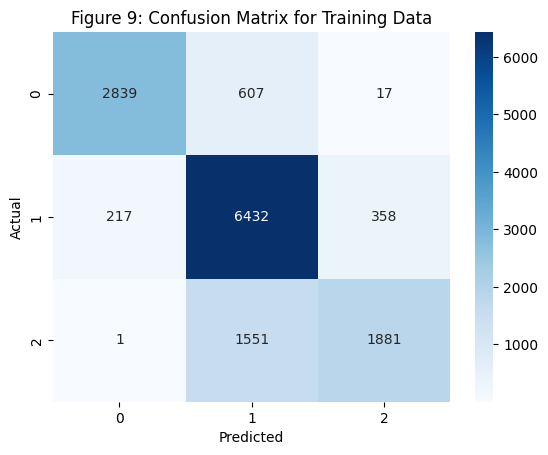

Accuracy: 0.8021290368985111
Precision: 0.8145786857406546
Recall: 0.8021290368985111


In [343]:
## Let's calulate the accuracy of the model on training data
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm_train = confusion_matrix(y_train_rf_opt, y_pred_rf_opt_train)

## Plot the confusion matrix
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Figure 9: Confusion Matrix for Training Data')
plt.show()

accuracy = accuracy_score(y_train_rf_opt, y_pred_rf_opt_train)
precision = precision_score(y_train_rf_opt, y_pred_rf_opt_train, average='weighted')
recall = recall_score(y_train_rf_opt, y_pred_rf_opt_train, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Check the model on the test data

In [344]:
## predict the results of the test data
y_pred_rf_opt_test = forrest_class.predict(x_test_rf_opt)
y_pred_rf_opt_test

array([2, 3, 1, ..., 1, 1, 2])

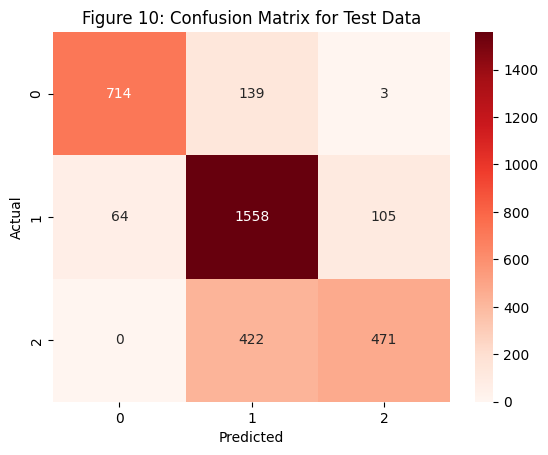

Accuracy: 0.7891254315304949
Precision: 0.8002861415875936
Recall: 0.7891254315304949


In [345]:
## Let's calulate the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test_rf_opt, y_pred_rf_opt_test)

## Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Figure 10: Confusion Matrix for Test Data')
plt.show()

accuracy = accuracy_score(y_test_rf_opt, y_pred_rf_opt_test)
precision = precision_score(y_test_rf_opt, y_pred_rf_opt_test, average='weighted')
recall = recall_score(y_test_rf_opt, y_pred_rf_opt_test, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Feature Importance

In [346]:
from sklearn.inspection import permutation_importance
#model interpretation
rel_impo_small = permutation_importance(forrest_class, x_test_rf_opt, y_test_rf_opt,n_repeats=30,random_state=2005)

#build a dataframe to store the results
df_rel_impo_small = pd.DataFrame({"feature":x_test_rf_opt.columns,"importance":rel_impo_small.importances_mean, "sd":rel_impo_small.importances_std})

#take a look
df_rel_impo_small.sort_values(by='importance', ascending=False,inplace=True)

df_rel_impo_small

,feature,importance,sd
1,Hour_Cleaned,0.338723,0.007023
3,WorkingDay_Cleaned,0.050518,0.003502
4,Temp_Celcius,0.033765,0.004451
5,Feel_Temp_Celcius,0.017501,0.002764
0,Year_Cleaned,0.008976,0.001811
6,hum,0.005888,0.002086
2,Weekday_Cleaned,0.003443,0.001909


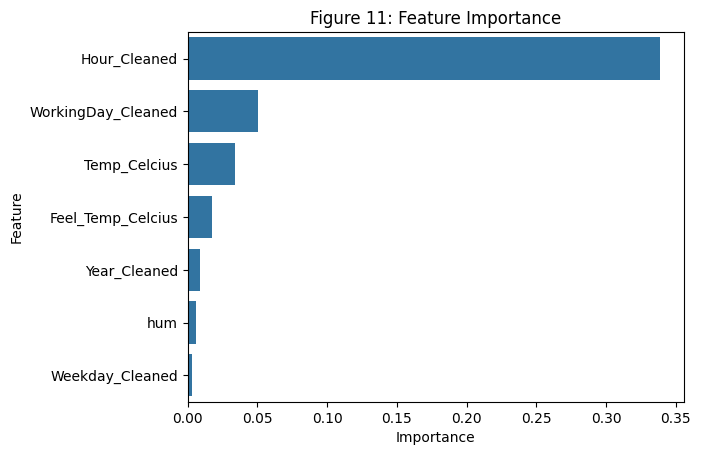

In [347]:
sns.barplot(data=df_rel_impo_small, y='feature', x='importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 11: Feature Importance')
plt.show()